<a href="https://colab.research.google.com/github/hoeen/kaggle/blob/main/boston_house_price_clonecoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets.boston_housing import load_data
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

## 데이터 로드

- 데이터의 수가 적기 때문에 test의 비율을 20%로 지정
- 13개의 특성을 가짐
- 각각의 특성이 스케일이 다 다름
- 정답 레이블은 주택 가격의 중간가격

In [2]:
tf.random.set_seed(111)

(x_train_full, y_train_full), (x_test, y_test) = load_data(path='boston_housing.npz',
                                                           test_split=0.2, seed=111)

65536/57026 [==================================] - 0s 0us/step


In [5]:
print('학습 데이터: {}\t레이블: {}'.format(x_train_full.shape, y_train_full.shape))
print('테스트 데이터: {}\t레이블: {}'.format(x_test.shape, y_test.shape))

학습 데이터: (404, 13)	레이블: (404,)
테스트 데이터: (102, 13)	레이블: (102,)


In [6]:
print(x_train_full[0])

[2.8750e-02 2.8000e+01 1.5040e+01 0.0000e+00 4.6400e-01 6.2110e+00
 2.8900e+01 3.6659e+00 4.0000e+00 2.7000e+02 1.8200e+01 3.9633e+02
 6.2100e+00]


In [9]:
print(y_train_full[0])  # 1000달러 단위

25.0


## 데이터 전처리
- Standardization
- 동일한 범위로 조정

In [13]:
mean = np.mean(x_train_full, axis=0)
std = np.std(x_train_full, axis=0)
x_train_preprocessed = (x_train_full - mean) / std
x_test = (x_test - mean) / std

x_train, x_val, y_train, y_val = train_test_split(x_train_preprocessed, y_train_full,
                                                  test_size=0.3,
                                                  random_state=111)

In [14]:
print("학습 데이터: {}\t레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {}\t레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {}\t레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {}\t레이블: {}".format(x_test.shape, y_test.shape))

학습 데이터: (404, 13)	레이블: (404,)
학습 데이터: (282, 13)	레이블: (282,)
검증 데이터: (122, 13)	레이블: (122,)
테스트 데이터: (102, 13)	레이블: (102,)


## 모델 구성
- 학습 데이터가 매우 적은 경우에 모델의 깊이를 깊게 할수록  
과대적합(Overfitting)이 일어날 확률이 높음

In [15]:
model = Sequential([Dense(100, activation='relu', input_shape=(13, ), name='dense1'),
                    Dense(64, activation='relu', name='dense2'),
                    Dense(32, activation='relu', name='dense3'),
                    Dense(1, name='output')])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense1 (Dense)              (None, 100)               1400      
                                                                 
 dense2 (Dense)              (None, 64)                6464      
                                                                 
 dense3 (Dense)              (None, 32)                2080      
                                                                 
 output (Dense)              (None, 1)                 33        
                                                                 
Total params: 9,977
Trainable params: 9,977
Non-trainable params: 0
_________________________________________________________________


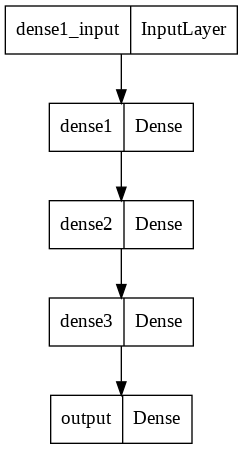

In [17]:
plot_model(model)

## 모델 컴파일
- 회귀 문제에서는 주로 mse를 손실함수로, 평균절대오차(mae)를 평가지표로 많이 사용한다.

In [18]:
model.compile(loss='mse', 
              optimizer=Adam(learning_rate=1e-2),
              metrics=['mae'])

## 모델 학습

In [19]:
history = model.fit(x_train, y_train, epochs=300,
                    validation_data=(x_val, y_val))

Epoch 1/300
9/9 [==============================] - 2s 45ms/step - loss: 285.1888 - mae: 14.0729 - val_loss: 132.4612 - val_mae: 9.1090
Epoch 2/300
9/9 [==============================] - 0s 10ms/step - loss: 60.9891 - mae: 5.9218 - val_loss: 31.4368 - val_mae: 4.4589
Epoch 3/300
9/9 [==============================] - 0s 12ms/step - loss: 33.7114 - mae: 4.2293 - val_loss: 22.2753 - val_mae: 3.6017
Epoch 4/300
9/9 [==============================] - 0s 9ms/step - loss: 21.5946 - mae: 3.4391 - val_loss: 13.9826 - val_mae: 2.9190
Epoch 5/300
9/9 [==============================] - 0s 10ms/step - loss: 16.3538 - mae: 2.8935 - val_loss: 11.7222 - val_mae: 2.7147
Epoch 6/300
9/9 [==============================] - 0s 11ms/step - loss: 13.6432 - mae: 2.5889 - val_loss: 10.9746 - val_mae: 2.5883
Epoch 7/300
9/9 [==============================] - 0s 13ms/step - loss: 12.6475 - mae: 2.4426 - val_loss: 9.1843 - val_mae: 2.3985
Epoch 8/300
9/9 [==============================] - 0s 11ms/step - loss: 12.

## 모델 평가
- evaluate()

In [22]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 5ms/step - loss: 5479.6675 - mae: 62.2101


[5479.66748046875, 62.210079193115234]

영상과는 다르게 test 데이터의 evaluate 에 따른 loss가 매우 높게 나옴.. 왜?

In [23]:
print(history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


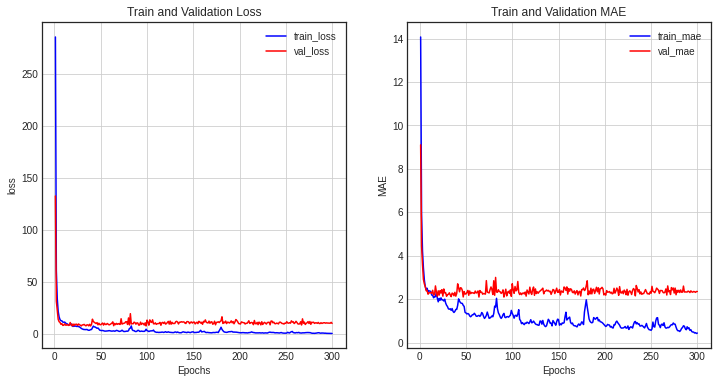

In [26]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color='b', label='train_loss')
ax1.plot(epochs, val_loss, color='r', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, mae, color='b', label='train_mae')
ax2.plot(epochs, val_mae, color='r', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('MAE')
ax2.grid()
ax2.legend()

plt.show()

## K-Fold 교차 검증
- 데이터셋의 크기가 매우 작은 경우에  
[훈련, 검증, 테스트] 데이터로 나누게 되면 과소적합이 일어날 확률이 높음
- 이를 해결하기 위해 K-Fold 교차 검증 실행

In [38]:
from sklearn.model_selection import KFold
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

In [27]:
tf.random.set_seed(111)

(x_train_full, y_train_full), (x_test, y_test) = load_data(path='boston_housing.npz',
                                                           test_split=0.2, seed=111)

mean = np.mean(x_train_full, axis=0)
std = np.std(x_train_full, axis=0)
x_train_preprocessed = (x_train_full - mean) / std
x_test = (x_test - mean) / std


In [32]:
k = 3

kfold = KFold(n_splits=k)

In [34]:
def build_model():
    input = Input(shape=(13, ), name='input')
    hidden1 = Dense(100, activation='relu', name='dense1')(input)
    hidden2 = Dense(64, activation='relu', name='dense2')(hidden1)
    hidden3 = Dense(32, activation='relu', name='dense3')(hidden2)
    output = Dense(1, name='output')(hidden3)
    
    model = Model(inputs=[input], outputs=output)

    model.compile(loss='mse', optimizer='adam', metrics=['mae'])

    return model

Q: 함수형과 Sequential로 모델 만들때의 차이점 및 장단점은?

In [35]:
mae_list = []

In [39]:
for train_idx, val_idx in kfold.split(x_train):
    x_train_fold, x_val_fold = x_train[train_idx], x_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    model = build_model()

    model.fit(x_train_fold, y_train_fold, epochs=300,
              validation_data=(x_val_fold, y_val_fold))
    
    _, test_mae = model.evaluate(x_test, y_test)

    mae_list.append(test_mae)

    

Epoch 1/300
6/6 [==============================] - 1s 36ms/step - loss: 579.3210 - mae: 22.1051 - val_loss: 506.6597 - val_mae: 21.0692
Epoch 2/300
6/6 [==============================] - 0s 12ms/step - loss: 548.0917 - mae: 21.4028 - val_loss: 478.9495 - val_mae: 20.4060
Epoch 3/300
6/6 [==============================] - 0s 10ms/step - loss: 514.8639 - mae: 20.6378 - val_loss: 446.4250 - val_mae: 19.5962
Epoch 4/300
6/6 [==============================] - 0s 7ms/step - loss: 476.0873 - mae: 19.6777 - val_loss: 405.7285 - val_mae: 18.5324
Epoch 5/300
6/6 [==============================] - 0s 8ms/step - loss: 427.9754 - mae: 18.4248 - val_loss: 353.6115 - val_mae: 17.1139
Epoch 6/300
6/6 [==============================] - 0s 12ms/step - loss: 366.9639 - mae: 16.7816 - val_loss: 288.7289 - val_mae: 15.1829
Epoch 7/300
6/6 [==============================] - 0s 9ms/step - loss: 294.5549 - mae: 14.7433 - val_loss: 213.2458 - val_mae: 12.7160
Epoch 8/300
6/6 [==============================] - 

In [40]:
print(mae_list)

[3.2167961597442627, 3.0090439319610596, 3.3557770252227783]


In [41]:
print(np.mean(mae_list))

3.1938723723093667
